# WiDS Datathon 2024 Challenge #2


#### Here we are going to clean and preprocess the test dataset

In [1]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



## To view max columns

pd.pandas.set_option('display.max_columns', None )

In [2]:
# import datasets

test  =pd.read_csv('test.csv')

In [3]:
test.head(4)

,patient_id,patient_race,payer_type,patient_state,patient_zip3,Region,Division,patient_age,patient_gender,bmi,breast_cancer_diagnosis_code,breast_cancer_diagnosis_desc,metastatic_cancer_diagnosis_code,metastatic_first_novel_treatment,metastatic_first_novel_treatment_type,population,density,age_median,age_under_10,age_10_to_19,age_20s,age_30s,age_40s,age_50s,age_60s,age_70s,age_over_80,male,female,married,divorced,never_married,widowed,family_size,family_dual_income,income_household_median,income_household_under_5,income_household_5_to_10,income_household_10_to_15,income_household_15_to_20,income_household_20_to_25,income_household_25_to_35,income_household_35_to_50,income_household_50_to_75,income_household_75_to_100,income_household_100_to_150,income_household_150_over,income_household_six_figure,income_individual_median,home_ownership,housing_units,home_value,rent_median,rent_burden,education_less_highschool,education_highschool,education_some_college,education_bachelors,education_graduate,education_college_or_above,education_stem_degree,labor_force_participation,unemployment_rate,self_employed,farmer,race_white,race_black,race_asian,race_native,race_pacific,race_other,race_multiple,hispanic,disabled,poverty,limited_english,commute_time,health_uninsured,veteran,Average of Jan-13,Average of Feb-13,Average of Mar-13,Average of Apr-13,Average of May-13,Average of Jun-13,Average of Jul-13,Average of Aug-13,Average of Sep-13,Average of Oct-13,Average of Nov-13,Average of Dec-13,Average of Jan-14,Average of Feb-14,Average of Mar-14,Average of Apr-14,Average of May-14,Average of Jun-14,Average of Jul-14,Average of Aug-14,Average of Sep-14,Average of Oct-14,Average of Nov-14,Average of Dec-14,Average of Jan-15,Average of Feb-15,Average of Mar-15,Average of Apr-15,Average of May-15,Average of Jun-15,Average of Jul-15,Average of Aug-15,Average of Sep-15,Average of Oct-15,Average of Nov-15,Average of Dec-15,Average of Jan-16,Average of Feb-16,Average of Mar-16,Average of Apr-16,Average of May-16,Average of Jun-16,Average of Jul-16,Average of Aug-16,Average of Sep-16,Average of Oct-16,Average of Nov-16,Average of Dec-16,Average of Jan-17,Average of Feb-17,Average of Mar-17,Average of Apr-17,Average of May-17,Average of Jun-17,Average of Jul-17,Average of Aug-17,Average of Sep-17,Average of Oct-17,Average of Nov-17,Average of Dec-17,Average of Jan-18,Average of Feb-18,Average of Mar-18,Average of Apr-18,Average of May-18,Average of Jun-18,Average of Jul-18,Average of Aug-18,Average of Sep-18,Average of Oct-18,Average of Nov-18,Average of Dec-18
0,730681,NaN,COMMERCIAL,LA,713,South,West South Central,55,F,NaN,1746,Malignant neoplasm of axillary tail of female ...,C7981,NaN,NaN,4639.07,72.66,41.50,11.40,13.44,11.42,11.45,12.56,13.08,14.26,7.71,4.73,50.02,49.98,42.37,14.70,34.76,8.18,3.30,38.83,40643.61,6.77,5.02,9.93,7.53,6.36,11.54,12.60,12.70,11.60,9.53,6.43,15.97,22663.32,74.78,1698.43,113973.9,671.07,37.23,21.30,36.81,26.95,9.74,5.21,14.94,38.47,49.41,8.08,12.89,4.88,66.51,29.06,0.40,0.37,0.10,0.66,2.91,2.52,20.33,27.62,0.55,29.71,8.18,5.79,51.34,53.19,54.23,64.00,72.08,81.10,80.89,82.15,79.95,68.38,53.90,48.64,42.32,48.58,54.30,64.82,71.66,80.19,80.20,81.40,77.97,68.84,52.59,52.09,46.08,46.21,58.97,69.57,74.68,80.54,84.27,86.11,78.99,69.81,62.72,58.46,47.79,54.72,63.75,72.19,73.58,80.75,86.61,83.09,80.58,71.67,62.00,52.89,56.28,60.76,63.94,69.87,71.66,78.19,82.68,80.93,76.97,68.88,61.15,49.82,42.66,58.12,62.21,62.23,78.34,81.96,83.58,82.22,80.20,69.73,53.14,51.34
1,334212,Black,NaN,NC,283,South,South Atlantic,60,F,40.00,C50912,Malignant neoplasm of unspecified site of left...,C773,NaN,NaN,10875.30,217.91,39.64,11.23,13.72,15.01,12.02,11.58,11.77,12.77,8.52,3.41,51.33,48.67,44.14,13.28,34.62,7.96,3.33,42.57,49924.38,4.59,3.83,6.58,5.27,5.90,13.16,13.99,18.14,10.65,11.39,6.49,17.88,26495.64,67.09,4034.71,119537.2,806.92,31.42,15.22,31.24,34.65,12.87,6.00,18.88,36.55,56.90,8.38,10.64,1.40,54.08,26.66,0.80,8.35,0.13,4.83,5.14,10.76,17.82,

In [4]:
test.shape

(5646, 151)

#### There are 5646 rows and 151 columns

#### metastatic_diagnosis_period has been removed and that would be the target

#

## Data Cleaning & Feature Engineering
Drops columns with heavy missingness

<Axes: >

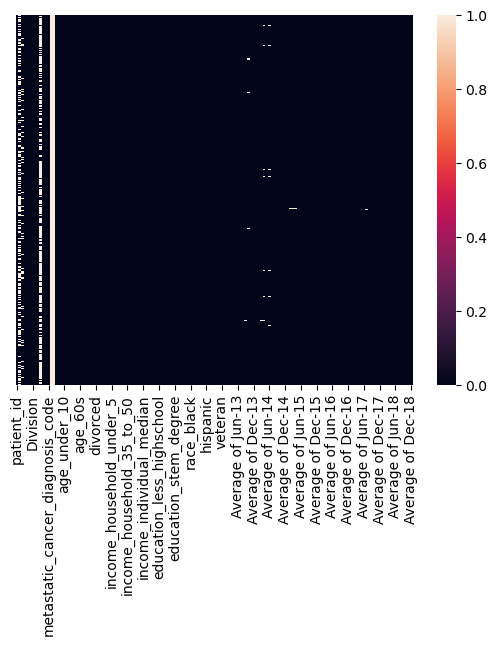

In [5]:
#plot heatmap to search null values

sns.heatmap(test.isnull(),yticklabels=False )

In [6]:
# identify categorical features
cat_features = [feature for feature in test.columns if test[feature].dtypes =='O']
print('Number of categorical feature : {} '.format(len(cat_features)), '\n',cat_features)

Number of categorical feature : 11  
 ['patient_race', 'payer_type', 'patient_state', 'Region', 'Division', 'patient_gender', 'breast_cancer_diagnosis_code', 'breast_cancer_diagnosis_desc', 'metastatic_cancer_diagnosis_code', 'metastatic_first_novel_treatment', 'metastatic_first_novel_treatment_type']


In [7]:
# identify numerical features
num_features = [feature for feature in test.columns if test[feature].dtypes !='O']
print('Number of categorical feature : {} '.format(len(num_features)), '\n',num_features)

Number of categorical feature : 140  
 ['patient_id', 'patient_zip3', 'patient_age', 'bmi', 'population', 'density', 'age_median', 'age_under_10', 'age_10_to_19', 'age_20s', 'age_30s', 'age_40s', 'age_50s', 'age_60s', 'age_70s', 'age_over_80', 'male', 'female', 'married', 'divorced', 'never_married', 'widowed', 'family_size', 'family_dual_income', 'income_household_median', 'income_household_under_5', 'income_household_5_to_10', 'income_household_10_to_15', 'income_household_15_to_20', 'income_household_20_to_25', 'income_household_25_to_35', 'income_household_35_to_50', 'income_household_50_to_75', 'income_household_75_to_100', 'income_household_100_to_150', 'income_household_150_over', 'income_household_six_figure', 'income_individual_median', 'home_ownership', 'housing_units', 'home_value', 'rent_median', 'rent_burden', 'education_less_highschool', 'education_highschool', 'education_some_college', 'education_bachelors', 'education_graduate', 'education_college_or_above', 'education_

In [9]:
#let's find % of missing values of categorical features

for feature in test[cat_features]:
    print(f'{feature} has {test[feature].isnull().sum()} missing values')
    print(f'Missing value %: {test[feature].isnull().sum()/len(test)*100}%')
    print('------------------------------')

patient_race has 2785 missing values
Missing value %: 49.32695713779667%
------------------------------
payer_type has 785 missing values
Missing value %: 13.903648600779311%
------------------------------
patient_state has 0 missing values
Missing value %: 0.0%
------------------------------
Region has 0 missing values
Missing value %: 0.0%
------------------------------
Division has 0 missing values
Missing value %: 0.0%
------------------------------
patient_gender has 0 missing values
Missing value %: 0.0%
------------------------------
breast_cancer_diagnosis_code has 0 missing values
Missing value %: 0.0%
------------------------------
breast_cancer_diagnosis_desc has 0 missing values
Missing value %: 0.0%
------------------------------
metastatic_cancer_diagnosis_code has 0 missing values
Missing value %: 0.0%
------------------------------
metastatic_first_novel_treatment has 5639 missing values
Missing value %: 99.87601842012043%
------------------------------
metastatic_first

In [10]:
#let's find % of missing values of numerical features

for feature in test[num_features]:
    print(f'{feature} has {test[feature].isnull().sum()} missing values')
    print(f'Missing value %: {test[feature].isnull().sum()/len(test)*100}%')
    print('------------------------------')

patient_id has 0 missing values
Missing value %: 0.0%
------------------------------
patient_zip3 has 0 missing values
Missing value %: 0.0%
------------------------------
patient_age has 0 missing values
Missing value %: 0.0%
------------------------------
bmi has 3941 missing values
Missing value %: 69.8016294721927%
------------------------------
population has 0 missing values
Missing value %: 0.0%
------------------------------
density has 0 missing values
Missing value %: 0.0%
------------------------------
age_median has 0 missing values
Missing value %: 0.0%
------------------------------
age_under_10 has 0 missing values
Missing value %: 0.0%
------------------------------
age_10_to_19 has 0 missing values
Missing value %: 0.0%
------------------------------
age_20s has 0 missing values
Missing value %: 0.0%
------------------------------
age_30s has 0 missing values
Missing value %: 0.0%
------------------------------
age_40s has 0 missing values
Missing value %: 0.0%
-------

In [12]:
# Here we are going to treat for null values of categorical features

# patient_race has 2785 missing values  49.32695713779667%
# payer_type has 785 missing values 13.903648600779311%
# metastatic_first_novel_treatment has 5639 missing values  99.87601842012043%
# metastatic_first_novel_treatment_type has 5639 missing values  99.87601842012043%
    
columns_to_drop =['patient_race','payer_type' ,'metastatic_first_novel_treatment', 'metastatic_first_novel_treatment_type']

# Dropping heavey missing value columns
test.drop(['patient_race','payer_type' ,'metastatic_first_novel_treatment', 'metastatic_first_novel_treatment_type'], axis=1, inplace=True)

In [13]:
# update new categorical feature list

cat_features_new =[feature for feature in cat_features if feature not in columns_to_drop]
print(f'Length :{len(cat_features_new)}', cat_features_new)

Length :7 ['patient_state', 'Region', 'Division', 'patient_gender', 'breast_cancer_diagnosis_code', 'breast_cancer_diagnosis_desc', 'metastatic_cancer_diagnosis_code']


In [14]:
test.shape

(5646, 147)

In [16]:
test[cat_features_new].isnull().sum()

patient_state                       0
Region                              0
Division                            0
patient_gender                      0
breast_cancer_diagnosis_code        0
breast_cancer_diagnosis_desc        0
metastatic_cancer_diagnosis_code    0
dtype: int64

In [17]:
# Here we are going to treat for null values of numerical features

# bmi has 3941 missing values Missing value %: 69.8016294721927%


#filter null features from numerical features of train
null_num_values = [feature for feature in test[num_features] if test[feature].isnull().sum()>1]
len(null_num_values)


#null will be impute by mean of particular feature

for feature in null_num_values:
    test[feature]=test[feature].fillna(test[feature].mean())

<Axes: >

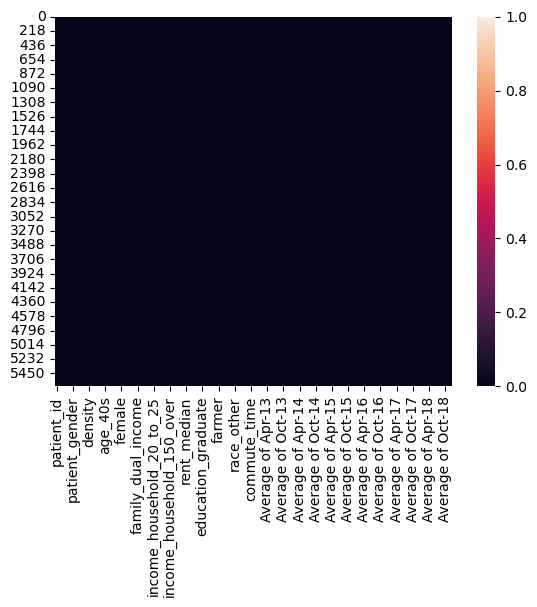

In [18]:
sns.heatmap(test.isnull())

In [19]:
test.shape

(5646, 147)

In [20]:
test.to_csv('formulatedtest.csv',index=False)